### Proyek Kecerdasan Buatan

Ade Prasetyo 3.34.21.3.01

Ferina Ayu Fella Puspita 3.34.21.3.11

#### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

#### Load Dataset

In [2]:
!pip install kaggle

In [3]:
!pip install lazypredict

#### Load Dataset

In [2]:
data = pd.read_csv("car_price_prediction.csv")
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


#### Properti Data

In [3]:
data.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [32]:
data.shape

(19237, 18)

In [5]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


**Harga (Prize) dalam Dollar (mata uang Amerika). Perlu di konversi dalam Rupiah. 1 Dollar = Rp 15.130 (7/7/2023), sehingga perlu mengalikan prize dengan 15.130**

In [16]:
data['Price'] = data['Price'] * 15.130

#### Cek Missing Value & Data Duplication

In [17]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [18]:
data = data.drop_duplicates()

In [11]:
data.duplicated().sum()

0

**Dataset yang dipakai sudah bersih dari nilai Null dan terbebas dari duplikasi data**

#### **Exploratory Data Analysis**

**Melihat Korelasi Antar Kolom**

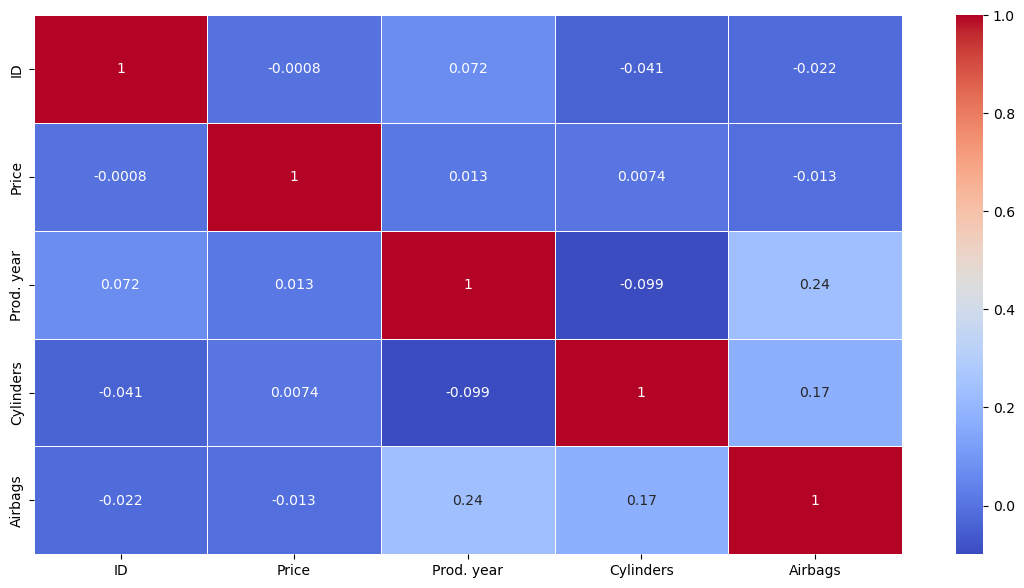

In [12]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

In [13]:
data.corr()['Price']

ID           -0.000797
Price         1.000000
Prod. year    0.012689
Cylinders     0.007435
Airbags      -0.012709
Name: Price, dtype: float64

**Menghapus Kolom yang tidak berkorelasi dengan Price**

In [14]:
data.drop(columns=['ID', 'Airbags', 'Wheel'], inplace=True)
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color
0,201652.64,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Silver
1,251475.73,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Black
2,128105.71,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Black
3,54573.91,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,White
4,177414.38,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Silver


**Mengganti Nama Kolom agar Mudah untuk Manipulasi Kolom**

In [15]:
data.rename(columns = {'Prod. year':'Year', 'Leather interior':'Interior', 'Fuel type':'Type','Gear box type':'Transmission', 'Drive wheels':'Drive'}, inplace = True)
data.head(11)

,Price,Levy,Manufacturer,Model,Year,Category,Interior,Type,Engine volume,Mileage,Cylinders,Transmission,Drive,Doors,Color
0,201652.64,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Silver
1,251475.73,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Black
2,128105.71,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Black
3,54573.91,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,White
4,177414.38,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Silver
5,597529.09,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,White
6,27279.39,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,White
7,8306.37,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Grey
8,16612.74,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Black
9,403320.41,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Silver


**Cek data kategorik yang ada di Kolom Interior**

In [16]:
data.Interior.unique()

array(['Yes', 'No'], dtype=object)

**Mengubah Data Kategorik menjadi Numerik agar dapat diketahui korelasinya dengan kolom Prize**

In [17]:
data.Interior = data.Interior.map({'No':0, 'Yes':1})

data.head()

,Price,Levy,Manufacturer,Model,Year,Category,Interior,Type,Engine volume,Mileage,Cylinders,Transmission,Drive,Doors,Color
0,201652.64,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Silver
1,251475.73,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Black
2,128105.71,-,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Black
3,54573.91,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,White
4,177414.38,446,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Silver


In [18]:
data.corr()['Price']

Price        1.000000
Year         0.012689
Interior     0.000551
Cylinders    0.007435
Name: Price, dtype: float64

**Cek Data Kategorik yang terdapat pada kolom Manufacturer dan Type**

In [19]:
data.Manufacturer.unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [20]:
data.Type.unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

**Dikarenakan data kategorik pada Manufacturer dan Type terlalu banyak, maka dilakukan penyederhanaan tipe Manufacturer dan Type**

In [21]:
#Simple Brand Category
def setbrandcategory(text):
    if text == 'LEXUS':
        return 'LEXUS'
    elif text == 'CHEVROLET':
        return 'CHEVROLET'
    elif text == 'HONDA':
        return 'HONDA'
    elif text == 'FORD':
        return 'FORD'
    elif text == 'HYUNDAI':
        return 'HYUNDAI'
    elif text == 'TOYOTA':
        return 'TOYOTA'
    elif text == 'MERCEDES-BENZ':
        return 'MERCEDES-BENZ'
    else:
        return 'Other'
    
data['Manufacturer'] = data['Manufacturer'].apply(lambda x:setbrandcategory(x))
data.head()

,Price,Levy,Manufacturer,Model,Year,Category,Interior,Type,Engine volume,Mileage,Cylinders,Transmission,Drive,Doors,Color
0,201652.64,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Silver
1,251475.73,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Black
2,128105.71,-,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Black
3,54573.91,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,White
4,177414.38,446,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Silver


In [ ]:
def setoscategory(text):
    if text == 'Hybrid':
        return 'Hybrid'
    elif text == 'Petrol':
        return 'Petrol'
    else:
        return 'Other'
    
data['Type'] = data['Type'].apply(lambda x:setoscategory(x))
data.head()

In [17]:
data = data.drop(data[data['Manufacturer'].isin(['Greatwell', 'Pontiac'])].index)
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.00,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.00,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.00,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.00,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.00,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.00,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.00,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.00,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.00,Automatic,Front,04-May,Left wheel,Black,4


In [33]:
data.loc[data['Manufacturer'] == 'LANCIA', 'Manufacturer'] = 'unknown'
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.00,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.00,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.00,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.00,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.00,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.00,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.00,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.00,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.00,Automatic,Front,04-May,Left wheel,Black,4


In [18]:
data.drop(columns=['Levy'], inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [19]:
data.dtypes

ID                    int64
Price                 int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

**Menyederhanakan Tipe Data dari Kolom Numerik**

In [9]:
data['Price'] = data['Price'].astype('int32')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int32  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [10]:
data.head()

,ID,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


**Melihat Sebaran Data dari Masing-Masing Kolom**

In [7]:
def pie_bool(data):
    
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
     
    Type_label = ['Hybrid', 'Petrol', 'Other']
    Manufacturer_label = ['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA', 'Other' ]

    values = data['Type'].value_counts().values
    fig.add_trace(go.Pie(labels=Type_label, values=values, name="Type", title="Type"),1, 1)

    values = data['Manufacturer'].value_counts().values
    fig.add_trace(go.Pie(labels=Manufacturer_label, values=values, name="Manufacturer", title="Manufaturer"),1, 2)

    fig.update_traces(hole=.55, hoverinfo="label+percent+name")

    fig.update_layout(title_text="Persebaran Data pada Kolom Type dan Manufacturer", title_xanchor="auto")
    fig.show()

In [ ]:
pie_bool(data)

<AxesSubplot:xlabel='Cylinders', ylabel='Count'>

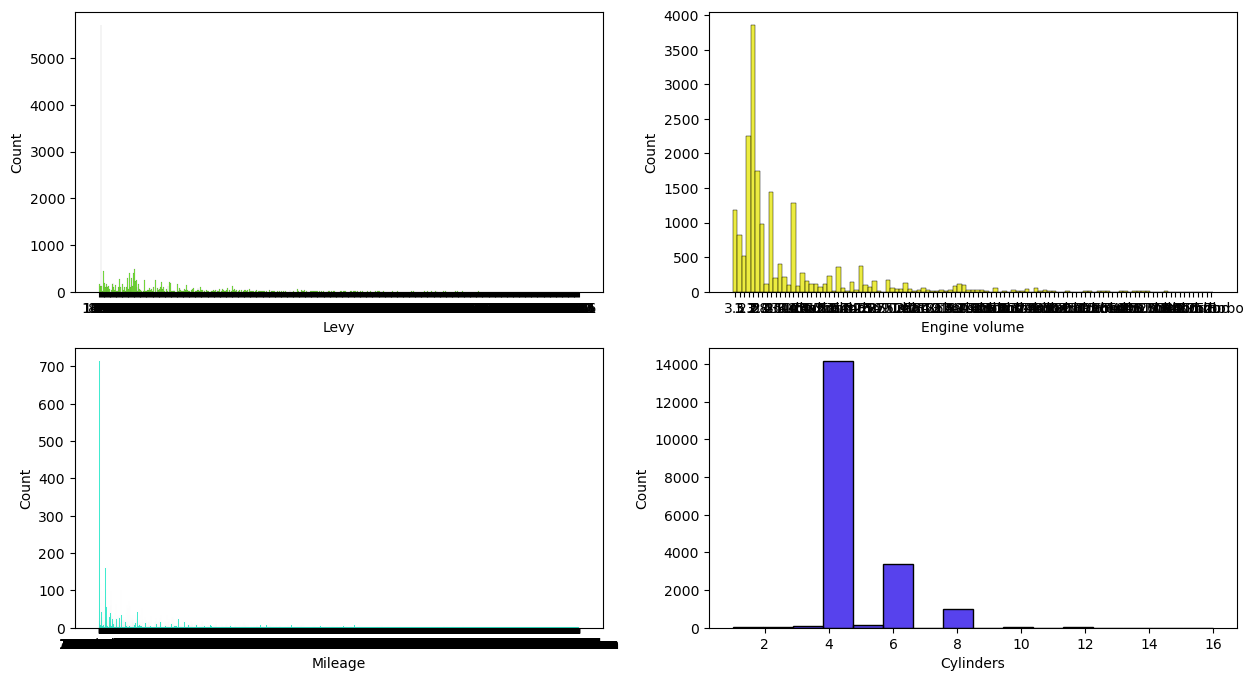

In [28]:
fig, axes = plt.subplots(2,2, figsize=(15,8))
sns.histplot(data=data, x='Levy', ax=axes[0,0], color='#52e600')
sns.histplot(data=data, x='Engine volume', ax=axes[0,1], color='#e6e600')
sns.histplot(data=data, x='Mileage', ax=axes[1,0], color='#03e8c3')
sns.histplot(data=data, x='Cylinders', ax=axes[1,1], color='#1f03e8')

## **Data Preparation**
* Melakukan seleksi fitur yaitu membagi data fitur dan data label
* Membagi dataset menjadi data training dan data testing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics

**Membagi dataset menjadi data latih dan data uji dengan prosentasi 80 : 20**

In [4]:
#Split Train and Test Set
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
X_train.shape, X_test.shape

((16351, 17), (2886, 17))

## **Membangun Model**

* Memprediksi algoritma dengan performa terbaik menggunakan LazyPredict
* Membuat pipeline untuk memudahkan proses preprocessing model
*	Menggunakan ColumnTransformer untuk menggabungkan pipeline data numerik dan data kategorik
* Memilih 3 (tiga) algoritma dengan performa terbaik untuk di evaluasi
* Menambahkan parameter tunning pada 3 algoritma yang dipilih

In [11]:
!pip install lazypredict

In [39]:
import pandas as pd

data = pd.read_csv("car_price_prediction.csv")

# Menghapus baris dengan kategori yang tidak dikenal dalam kolom pertama
data = data[~data.iloc[:, 0].isin(['2570', '4736', '1440', '2123', '2476', '1064', '3811', '3571', '1028', '2236', '605', '1516', '2308', '4741', '11714', '682', '1993', '3184', '4860', '1553', '3008', '3141', '970', '294', '1366', '3743', '668', '2421', '2269', '916', '5681', '461', '1866', '1518', '1662', '1531', '636', '1599', '3156', '681', '3208', '1279', '1297', '1198', '1901', '1107', '2913', '1252'])]

# Menyusun ulang indeks
data.reset_index(drop=True, inplace=True)


In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Display the model summaries
print(models)


  2%|█▉                                                                                 | 1/42 [00:04<02:45,  4.03s/it]

AdaBoostRegressor model failed to execute
Found unknown categories ['2570', '4736', '1440', '2123', '2476', '1064', '3811', '3571', '1028', '2236', '605', '1516', '2308', '4741', '11714', '682', '1993', '3184', '4860', '1553', '3008', '3141', '970', '294', '1366', '3743', '668', '2421', '2269', '916', '5681', '461', '1866', '1518', '1662', '1531', '636', '1599', '3156', '681', '3208', '1279', '1297', '1198', '1901', '1107', '2913', '1252'] in column 0 during transform


  5%|███▉                                                                               | 2/42 [00:06<02:09,  3.24s/it]

BaggingRegressor model failed to execute
Found unknown categories ['2570', '4736', '1440', '2123', '2476', '1064', '3811', '3571', '1028', '2236', '605', '1516', '2308', '4741', '11714', '682', '1993', '3184', '4860', '1553', '3008', '3141', '970', '294', '1366', '3743', '668', '2421', '2269', '916', '5681', '461', '1866', '1518', '1662', '1531', '636', '1599', '3156', '681', '3208', '1279', '1297', '1198', '1901', '1107', '2913', '1252'] in column 0 during transform


  7%|█████▉                                                                             | 3/42 [00:07<01:14,  1.92s/it]

BayesianRidge model failed to execute
Found unknown categories ['2570', '4736', '1440', '2123', '2476', '1064', '3811', '3571', '1028', '2236', '605', '1516', '2308', '4741', '11714', '682', '1993', '3184', '4860', '1553', '3008', '3141', '970', '294', '1366', '3743', '668', '2421', '2269', '916', '5681', '461', '1866', '1518', '1662', '1531', '636', '1599', '3156', '681', '3208', '1279', '1297', '1198', '1901', '1107', '2913', '1252'] in column 0 during transform


 10%|███████▉                                                                           | 4/42 [00:07<00:52,  1.38s/it]

DecisionTreeRegressor model failed to execute
Found unknown categories ['2570', '4736', '1440', '2123', '2476', '1064', '3811', '3571', '1028', '2236', '605', '1516', '2308', '4741', '11714', '682', '1993', '3184', '4860', '1553', '3008', '3141', '970', '294', '1366', '3743', '668', '2421', '2269', '916', '5681', '461', '1866', '1518', '1662', '1531', '636', '1599', '3156', '681', '3208', '1279', '1297', '1198', '1901', '1107', '2913', '1252'] in column 0 during transform


 12%|█████████▉                                                                         | 5/42 [00:07<00:36,  1.02it/s]

DummyRegressor model failed to execute
Found unknown categories ['2570', '4736', '1440', '2123', '2476', '1064', '3811', '3571', '1028', '2236', '605', '1516', '2308', '4741', '11714', '682', '1993', '3184', '4860', '1553', '3008', '3141', '970', '294', '1366', '3743', '668', '2421', '2269', '916', '5681', '461', '1866', '1518', '1662', '1531', '636', '1599', '3156', '681', '3208', '1279', '1297', '1198', '1901', '1107', '2913', '1252'] in column 0 during transform


 14%|███████████▊                                                                       | 6/42 [00:08<00:26,  1.34it/s]

ElasticNet model failed to execute
Found unknown categories ['2570', '4736', '1440', '2123', '2476', '1064', '3811', '3571', '1028', '2236', '605', '1516', '2308', '4741', '11714', '682', '1993', '3184', '4860', '1553', '3008', '3141', '970', '294', '1366', '3743', '668', '2421', '2269', '916', '5681', '461', '1866', '1518', '1662', '1531', '636', '1599', '3156', '681', '3208', '1279', '1297', '1198', '1901', '1107', '2913', '1252'] in column 0 during transform


 17%|█████████████▊                                                                     | 7/42 [00:08<00:26,  1.33it/s]

ElasticNetCV model failed to execute
Found unknown categories ['2570', '4736', '1440', '2123', '2476', '1064', '3811', '3571', '1028', '2236', '605', '1516', '2308', '4741', '11714', '682', '1993', '3184', '4860', '1553', '3008', '3141', '970', '294', '1366', '3743', '668', '2421', '2269', '916', '5681', '461', '1866', '1518', '1662', '1531', '636', '1599', '3156', '681', '3208', '1279', '1297', '1198', '1901', '1107', '2913', '1252'] in column 0 during transform


 19%|███████████████▊                                                                   | 8/42 [00:09<00:22,  1.52it/s]

ExtraTreeRegressor model failed to execute
Found unknown categories ['2570', '4736', '1440', '2123', '2476', '1064', '3811', '3571', '1028', '2236', '605', '1516', '2308', '4741', '11714', '682', '1993', '3184', '4860', '1553', '3008', '3141', '970', '294', '1366', '3743', '668', '2421', '2269', '916', '5681', '461', '1866', '1518', '1662', '1531', '636', '1599', '3156', '681', '3208', '1279', '1297', '1198', '1901', '1107', '2913', '1252'] in column 0 during transform


 21%|█████████████████▊                                                                 | 9/42 [00:24<02:51,  5.21s/it]

ExtraTreesRegressor model failed to execute
Found unknown categories ['2570', '4736', '1440', '2123', '2476', '1064', '3811', '3571', '1028', '2236', '605', '1516', '2308', '4741', '11714', '682', '1993', '3184', '4860', '1553', '3008', '3141', '970', '294', '1366', '3743', '668', '2421', '2269', '916', '5681', '461', '1866', '1518', '1662', '1531', '636', '1599', '3156', '681', '3208', '1279', '1297', '1198', '1901', '1107', '2913', '1252'] in column 0 during transform


 24%|███████████████████▌                                                              | 10/42 [00:24<01:57,  3.67s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


In [38]:
import pandas as pd

data = pd.read_csv("car_price_prediction.csv")

# Iterate through each column
for column in data.columns:
    unique_values = data[column].unique()
    print("Column:", column)
    print("Unknown Categories:", unique_values)
    print()


Column: ID
Unknown Categories: [45654403 44731507 45774419 ... 45804997 45793526 45813273]

Column: Price
Unknown Categories: [13328 16621  8467 ... 56814 63886 22075]

Column: Levy
Unknown Categories: ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793

In [14]:
from lazypredict.Supervised import LazyRegressor

# Declare the Function
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )

**Menambahkan library dari 3 algoritma teratas**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

### **Memilih Hyperparameter**

**Menghapus kolom Type dan Price terlebih dahulu karena data kategorikal**

In [22]:
#Split Train and Test Set
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X.head()

,ID,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.00,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.00,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.00,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.00,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.00,Automatic,Front,04-May,Left wheel,Silver,4


**Mencari Hyperparameter Algoritma GradientBossting**

In [24]:
GB = GradientBoostingRegressor()

parameters = {
    'n_estimators': [70, 80, 90, 100, 200],
    'max_features': [2, 3, 4, 5],
    'min_samples_split' : [10, 20, 30, 40],
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf' : [3, 4, 5, 6]
}

gb_search = GridSearchCV(GB, parameters)

gb_search.fit(X_train, y_train)

NameError: name 'GradientBoostingRegressor' is not defined

In [25]:
print(gb_search.best_params_)

NameError: name 'gb_search' is not defined

**Mencari Hyperparameter Algoritma RandomForest**

In [28]:
RF = RandomForestRegressor()

parameters = {
    'n_estimators': [70, 80, 90, 100, 200],
    'max_samples': [0.2 , 0.3, 0.4, 0.5, 0.6],
    'max_features' : [0.4, 0.5, 0.6, 0.7, 0.8]
}

rf_search = GridSearchCV(RF, parameters)

rf_search.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [29]:
print(rf_search.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

**Mencari Hyperparameter Algoritma BaggingRegressor**

In [10]:
BG = BaggingRegressor()

parameters = {
    'n_estimators': [70, 80, 90, 100, 200],
    'max_samples': [0.2 , 0.3, 0.4, 0.5, 0.6],
    'max_features': [0.4, 0.5, 0.6, 0.7, 0.8],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'warm_start': [True, False]
}
bg_search = GridSearchCV(BG, parameters)

bg_search.fit(X_train, y_train)

NameError: name 'BaggingRegressor' is not defined

In [9]:
print(bg_search.best_params_)

NameError: name 'bg_search' is not defined

**Mengembalikan kolom Manufacturer dan Type sebagai data fitur untuk pelatihan**

In [8]:
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


**Melihat index tiap kolom**

In [7]:
mapper = {i:value for i, value in enumerate(X_train.columns)}
mapper

{0: 'ID',
 1: 'Levy',
 2: 'Manufacturer',
 3: 'Model',
 4: 'Prod. year',
 5: 'Category',
 6: 'Leather interior',
 7: 'Fuel type',
 8: 'Engine volume',
 9: 'Mileage',
 10: 'Cylinders',
 11: 'Gear box type',
 12: 'Drive wheels',
 13: 'Doors',
 14: 'Wheel',
 15: 'Color',
 16: 'Airbags'}

**Menambahkan ColumnTransformer untuk menggabungkan data numerik dan kategorik**

In [11]:
feature = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 8])
], remainder='passthrough')

**Menggunakan Pipeline dan Hyperparameter**

In [12]:
GB = GradientBoostingRegressor(max_depth = 5, max_features = 4, min_samples_leaf = 4, 
                               min_samples_split = 10, n_estimators = 90, random_state=10)

GB_pipe = Pipeline([
    ('feature', feature),
    ('GB', GB)
])

GB_pipe.fit(X_train, y_train)

NameError: name 'GradientBoostingRegressor' is not defined

In [13]:
RF = RandomForestRegressor(max_features = 0.5, max_samples = 0.4, n_estimators = 90, random_state = 99)

RF_pipe = Pipeline([
    ('feature', feature),
    ('RF', RF)
])

RF_pipe.fit(X_train, y_train)

NameError: name 'RandomForestRegressor' is not defined

In [14]:
BG = BaggingRegressor(bootstrap = False, max_features = 0.7, max_samples = 0.6, 
                      n_estimators = 70, oob_score = False, warm_start = False)

BG_pipe = Pipeline([
    ('feature', feature),
    ('BG', BG)
])

BG_pipe.fit(X_train, y_train)

NameError: name 'BaggingRegressor' is not defined

## **Evaluation**
*	Metrik evaluasi yang digunakan adalah *Mean Square Error* (MSE), *Root Mean Square Error* (RMSE), dan *R2 Score*
* MSE melakukan pengurangan nilai data aktual dengan data peramalan dan hasilnya dikuadratkan (squared) kemudian dijumlahkan secara keseluruhan dan membaginya dengan banyaknya data yang ada
* RMSE adalah jumlah dari kesalahan kuadrat atau selisih antara nilai sebenarnya dengan nilai prediksi yang telah ditentukan. Cara menghitungnya tinggal mengakar kan mse menggunakan fungsi *np.sqrt*
* R2 Score dijadikan sebagai pengukuran seberapa baik garis regresi mendekati nilai data asli yang dibuat melalui model.
* Menampilkan hasil pengujian MSE, RMSE, dan R2 Score dari 3 algoritma teratas

### **Evaluasi 3 Model dengan Performa Terbaik**

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
import statsmodels.api as sm

In [17]:
import pandas as pd

# Assuming you have a dictionary named final_report
final_report = {
   'n_estimators': [70, 80, 90, 100, 200],
    'max_samples': [0.2 , 0.3, 0.4, 0.5, 0.6],
    'max_features' : [0.4, 0.5, 0.6, 0.7, 0.8]
}

# Convert the dictionary to a DataFrame
final_report_df = pd.DataFrame.from_dict(final_report)
final_report_df

,n_estimators,max_samples,max_features
0,70,0.2,0.4
1,80,0.3,0.5
2,90,0.4,0.6
3,100,0.5,0.7
4,200,0.6,0.8


In [20]:
from sklearn.metrics import r2_score

In [19]:
from sklearn.linear_model import LinearRegression

### **Membandingkan data sebenarnya dengan hasil prediksi**

In [6]:
model_dict = {'GB': GB_pipe, 'RF': RF_pipe, 'BG': BG_pipe}
prediksi = X_test.iloc[:130].copy()
pred_dict = {'y_true':y_test[:130]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

NameError: name 'GB_pipe' is not defined